### Notas do dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

REFERENCE: 
- https://medium.com/analytics-vidhya/credit-card-customers-segmentation-bc3c5c87ddc
- https://github.com/FeniRahmi/CC_segmentation/blob/main/C2G6%20CC%20(3%20clusters)%20updated.ipynb
- https://www.kaggle.com/des137/customer-segmentation-credit-cards
- Great analysis in R: https://rstudio-pubs-static.s3.amazonaws.com/534879_6ed594940e8444eebe25e5afc1fd7cfa.html
- https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-017-1998-9
- Boxcox: https://towardsdatascience.com/box-cox-transformation-explained-51d745e34203

In [37]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor



In [74]:
# Load data (EXCEL not CSV format), variables type and missing values
ds = pd.read_csv('CC GENERAL.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## EDA - DATA UNDERSTANDING

In [75]:
# Confirm that there are not any missing values
print(ds.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [76]:
#Dealing with missing data - removing the missing data from credit limit and replace missing values from 'MINIMUM_PAYMENTS'
#by its median
missing_data = ds['MINIMUM_PAYMENTS'].isnull().sum()/ds['MINIMUM_PAYMENTS'].count()*100
print(missing_data)

3.6239434989000814


In [77]:
#setting CUST ID as index
ds.set_index('CUST_ID', inplace = True)

In [78]:
# Summary statistics for all variables
summary=ds.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [79]:
ds.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Analysis

Nothing super strange, however we clearly have very long tail distributions with several variables with max values way bigger than the 75th percentil

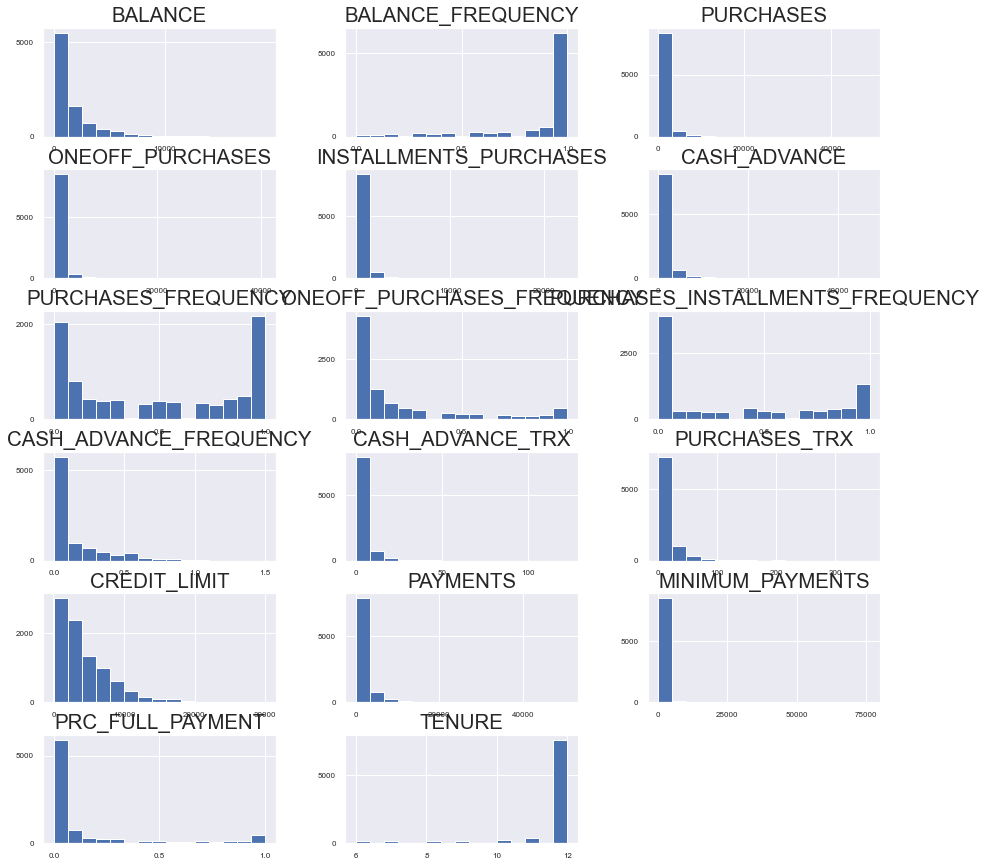

In [80]:
# Do histograms on all numeric variables
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=15, figsize=(15, 15), layout=(6, 3), xlabelsize=8, ylabelsize=8);

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

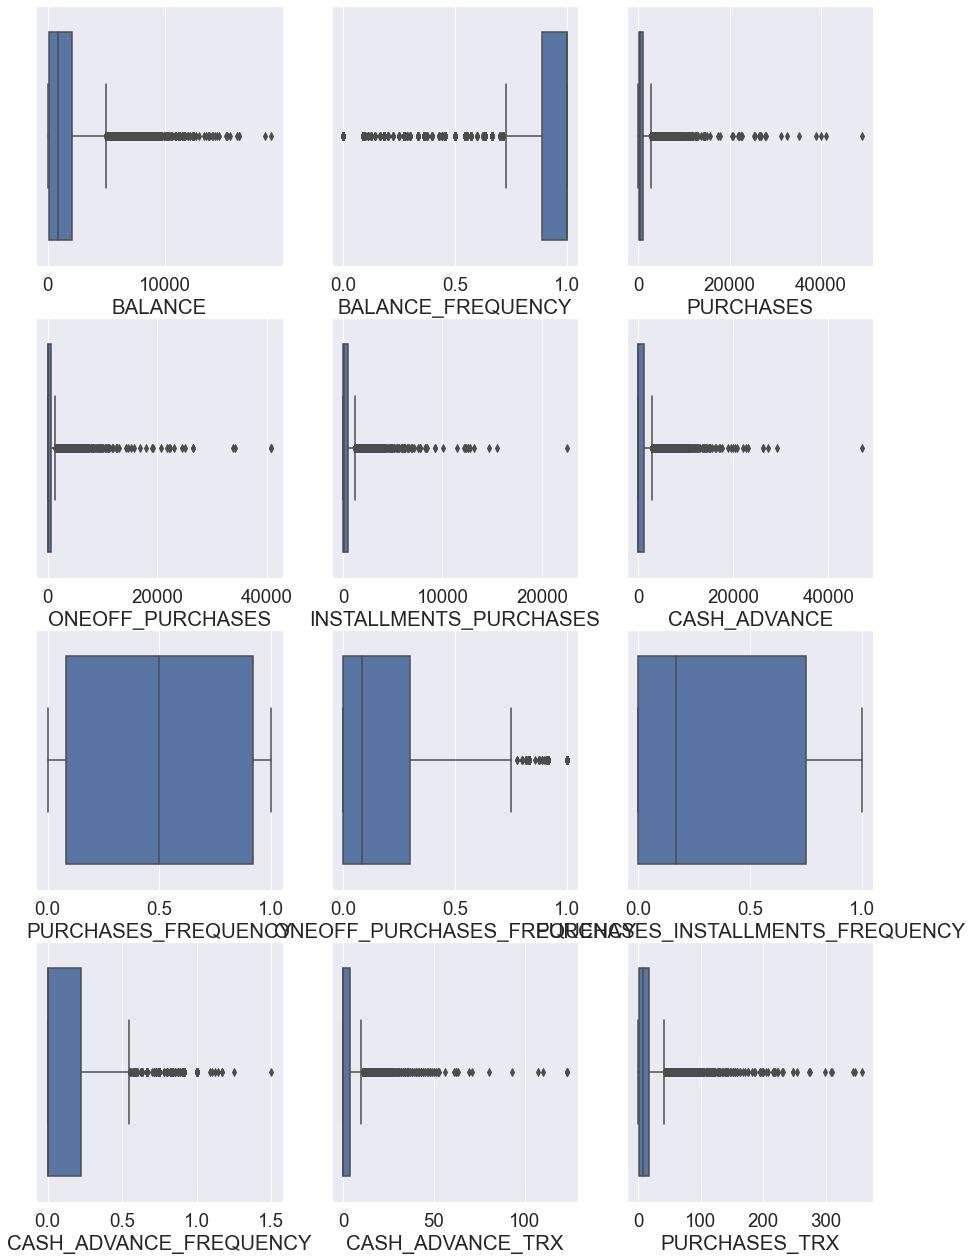

In [81]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 3, figsize=(15, 22))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(ds[var], ax=subplot)

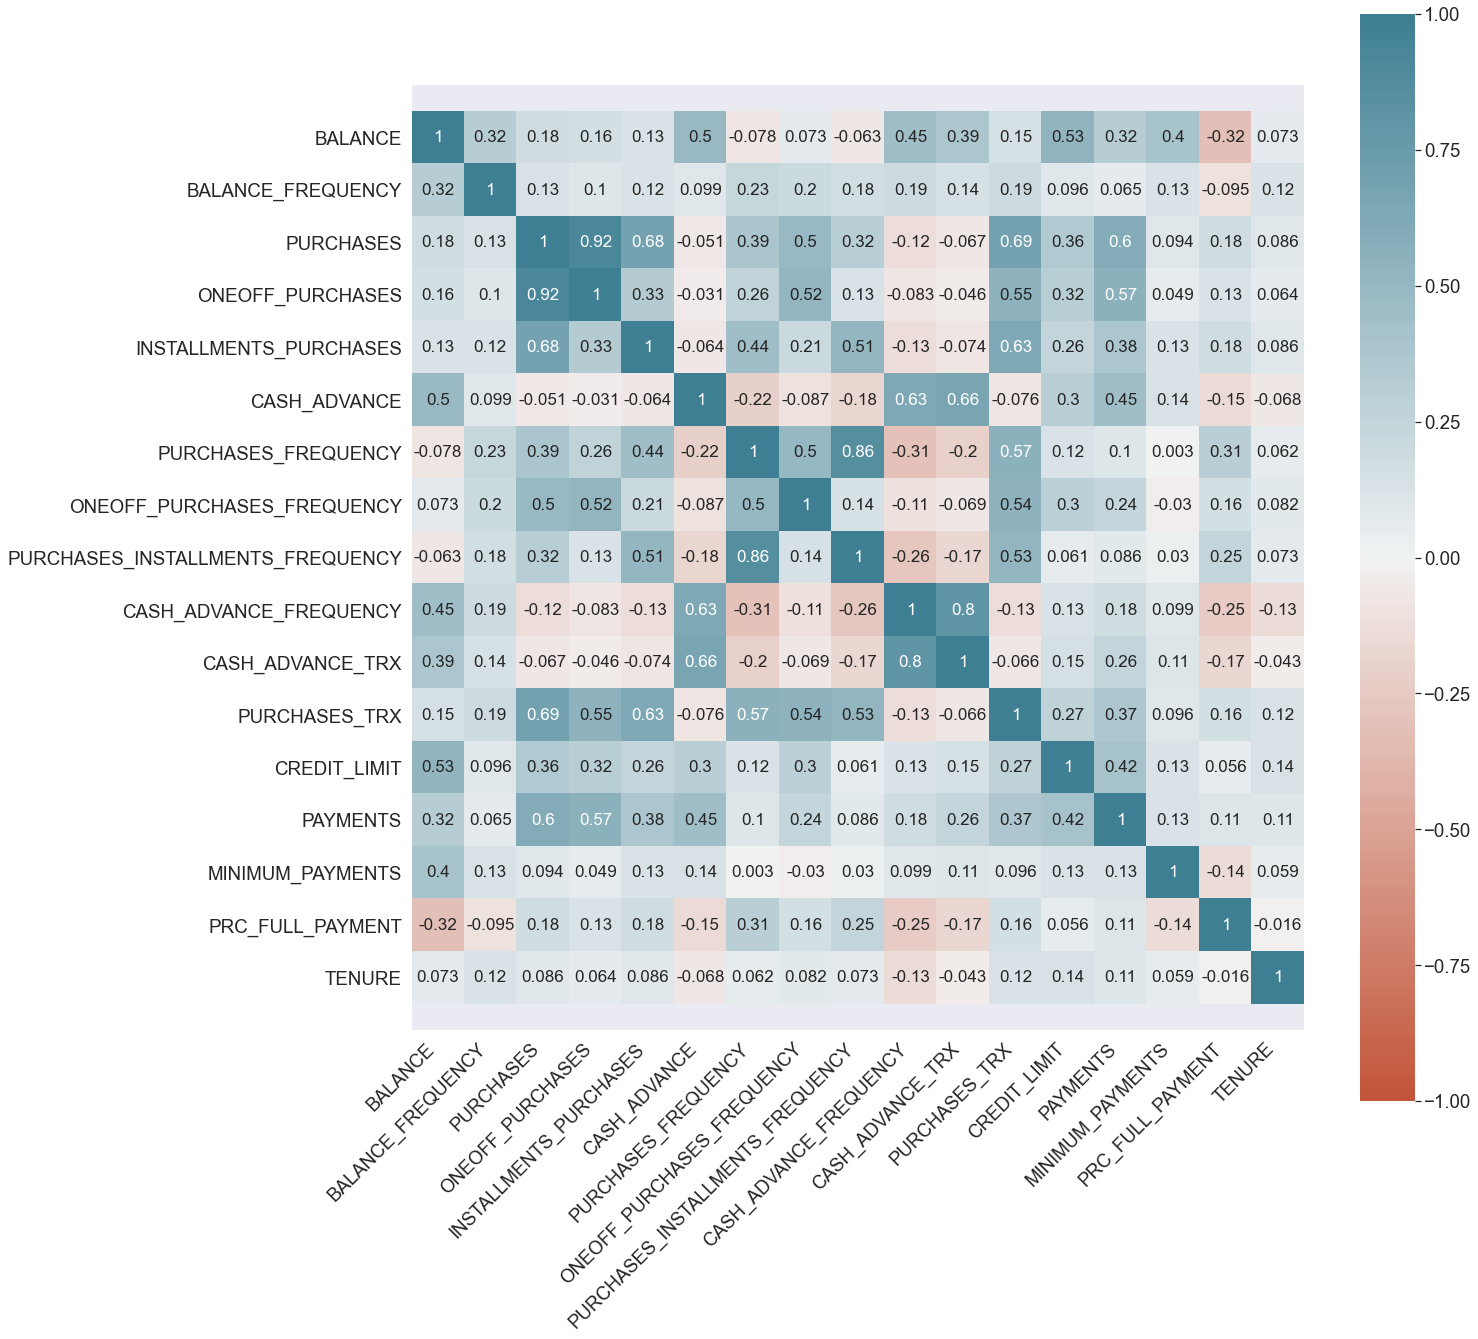

In [82]:
# Plot correlation heatmap of all numeric variables
corr = ds[numerical].corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale= 1.7)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 17}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [83]:
#Checking high corr variables
dataCorr = ds.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(bool))
correlation_mat = dataCorr
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]
strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]
print('correlations over/under 0.8 in the following variables:', "\n", strong_pairs,"\n", strong_pairs2)

correlations over/under 0.8 in the following variables: 
 CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY    0.799561
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY       0.862934
ONEOFF_PURCHASES                  PURCHASES                 0.916845
dtype: float64 
 Series([], dtype: float64)


## DATA PREPARATION

What's our plan:
 - What to do with Outliers?
 - Missing values: how will we approach them? Inputaion with algorithm? - we should just remove them

 - Data reduction: PCA?
 - Frequency variables what should we do?
 - Binning the data?
 - What new features should we create?

In [84]:
# Create a modeling dataset from the original dataset and dropping missing values
X = ds.copy(deep=True)

In [85]:
X = X.dropna()
print(X.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [86]:
#Replacing missing values with the median
#ds['MINIMUM_PAYMENTS'] = ds['MINIMUM_PAYMENTS'].fillna(ds['MINIMUM_PAYMENTS'].median())
#ds['CREDIT_LIMIT'] = ds['CREDIT_LIMIT'].fillna(ds['CREDIT_LIMIT'].median())
#ds.isnull().sum()

In [87]:
#trying to log10 the varible but not working well
#x['BALANCE'] = np.log10(x.BALANCE)
#x['BALANCE'].hist()
#ds[numerical].hist(bins=15, figsize=(15, 15), layout=(6, 3), xlabelsize=8, ylabelsize=8);

# Normalization

In [88]:
#Normalizing data beforing fitting it to the model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clustering_scaled = scaler.fit_transform(X)
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns = X.columns, index = X.index)
df_clustering_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
C10002,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
C10003,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
C10005,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
C10006,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


## PCA
https://365datascience.com/tutorials/python-tutorials/pca-k-means/

### Method 1

In [89]:
#Fitting the data into the PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_clustering_scaled)

PCA()

In [90]:
#PCA ratios
pca.explained_variance_ratio_

array([5.03955232e-01, 1.41781755e-01, 1.32912552e-01, 7.34316479e-02,
       5.71994024e-02, 3.63920330e-02, 1.86386577e-02, 1.39294555e-02,
       6.73272748e-03, 5.71488704e-03, 2.94774792e-03, 1.93635861e-03,
       1.31330333e-03, 1.28409975e-03, 1.10626151e-03, 7.23844979e-04,
       3.29000008e-08])

Text(0, 0.5, 'Cumulative Explained Variance')

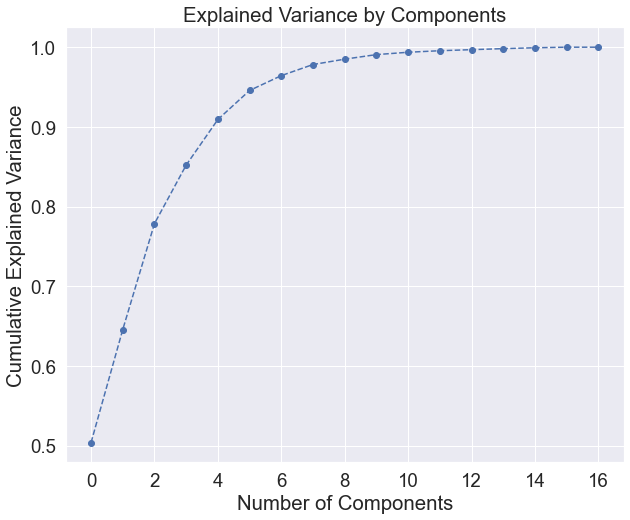

In [91]:
#Plotting the explaied variance of the components to select how many components to use
plt.figure(figsize = (10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

4 components explain around 85% of the data variance - rule of thumb >80%

In [92]:
#we choose 5 components according to the graphic
pca = PCA(n_components = 4)
pca.fit(df_clustering_scaled)

PCA(n_components=4)

In [93]:
#We need only the calculated resulting components scores for the elements in our data set:
pca.transform(df_clustering_scaled)

array([[-0.49204622, -0.10698665, -0.02461506, -0.0898645 ],
       [-0.62069095, -0.03013663,  0.11154432, -0.14493493],
       [ 0.29158121,  0.92292203, -0.13390568,  0.05588427],
       ...,
       [ 0.35722178, -0.39702329,  0.14424627,  0.89551805],
       [-0.65011311, -0.17049514,  0.31037383,  0.83889398],
       [-0.09625919,  0.4548037 ,  0.09494491,  1.02759295]])

In [94]:
scores_pca = pca.transform(df_clustering_scaled)

## K-Means clustering

In [95]:
from sklearn.cluster import KMeans

#defining the total number of clusters for the model and fiting our data into the model
nr_clusters = 20
wcss = []

for k in range(1, nr_clusters + 1):
    kmeans_pca = KMeans(n_clusters = k, random_state = 0)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [96]:
#creating a dataframe with the number of clusters and the sum of squared estimate of errors
df_wcss = pd.DataFrame({'nr_clusters': range(1, nr_clusters + 1), 'sse': wcss})
df_wcss.head()

,nr_clusters,sse
0,1,4804.804087
1,2,2467.503080
2,3,1910.628736
3,4,1598.847251
4,5,1391.482953


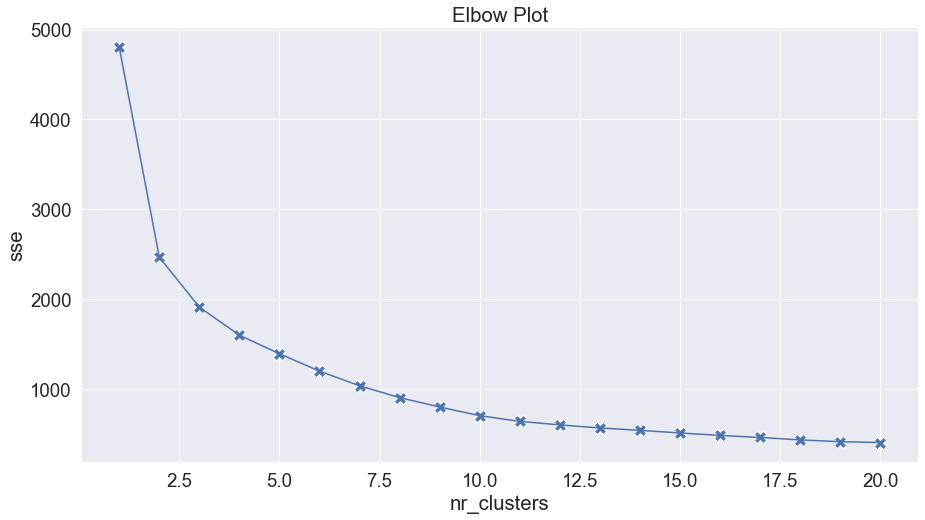

In [97]:
#plotting and elbow plot to identify the optimal number of clusters
plt.figure(figsize = (15, 8))
sns.lineplot(data = df_wcss, x = 'nr_clusters', y = 'sse')
sns.scatterplot(data = df_wcss, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
plt.title('Elbow Plot')
plt.show()

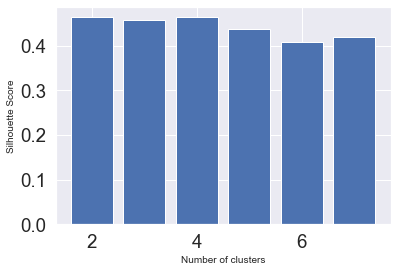

In [98]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(scores_pca, KMeans(n_clusters = n_cluster).fit_predict(scores_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

4 is the highest score

In [99]:
kmeans_pca = KMeans(n_clusters = 4, random_state = 0)

In [100]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=0)

## Analyzing clustergin with PCA results

In [101]:
#creating a table, from the normalized data, with the components and clusters
df_segm_pca_kmeans = pd.concat([df_clustering_scaled.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-4: ]=['Component 1', 'Component 2', 'Component 3', 'Component 4']

df_segm_pca_kmeans['Segment k-means PCA'] = kmeans_pca.labels_

In [102]:
df_segm_pca_kmeans.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Segment k-means PCA'],
      dtype='object')

In [103]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment k-means PCA'].map({0:'first', 
                                                                               1:'second', 
                                                                               2:'thrid', 
                                                                               3:'fourth'})

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



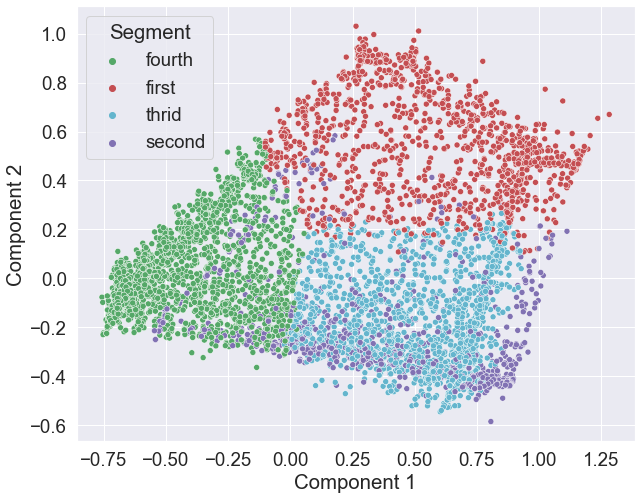

In [104]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm'])
plt.show()

Escolhemos component 1 e 2 porque sao o que explicam maior variancia. Pela maneira que estão criados os clusters, pode justificar mudar para 3 ou 5 clusters

In [105]:
#visualizing PCA 3d
import plotly.express as px
from sklearn.decomposition import PCA

df = df_clustering_scaled
#X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_segm_pca_kmeans['Segment'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [111]:
#creating a table, from the original data, with the components and clusters. 
df_segm_pca_kmeans_x = pd.concat([X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans_x.columns.values[-4: ]=['Component 1', 'Component 2', 'Component 3', 'Component 4']

df_segm_pca_kmeans_x['Segment k-means PCA'] = kmeans_pca.labels_



In [112]:
#Renaming the segments
df_segm_pca_kmeans_x['Segment'] = df_segm_pca_kmeans['Segment k-means PCA'].map({0:'first', 
                                                                               1:'second', 
                                                                               2:'thrid', 
                                                                               3:'fourth'})

In [114]:
df_segm_pca_kmeans_x.drop(columns=['Component 1', 'Component 2', 'Component 3', 'Component 4'], inplace=True)

In [123]:
segments_group_4 = df_segm_pca_kmeans_x.groupby('Segment').mean()
segments_group_4.transpose()

Segment,first,fourth,second,thrid
BALANCE,1882.573385,1844.134686,100.915857,1592.141577
BALANCE_FREQUENCY,0.979812,0.870610,0.766099,0.949713
PURCHASES,3323.792995,296.806173,954.825480,1197.741549
ONEOFF_PURCHASES,2523.682898,239.372989,270.991507,383.431498
INSTALLMENTS_PURCHASES,800.110097,57.640362,684.618886,814.803755
CASH_ADVANCE,659.672779,1425.981139,86.709900,709.892470
PURCHASES_FREQUENCY,0.908589,0.139923,0.697520,0.883179
ONEOFF_PURCHASES_FREQUENCY,0.835675,0.085343,0.093664,0.135514
PURCHASES_INSTALLMENTS_FREQUENCY,0.475658,0.054188,0.610694,0.829995
CASH_ADVANCE_FREQUENCY,0.089955,0.198106,0.010905,0.098024


Comparing 3 vs 4 clusters - it mergest cluster second with third

# K-Means Algorithm 3 Clusters

In [126]:
kmeans_pca = KMeans(n_clusters = 3, random_state = 0)

In [127]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=0)

In [128]:
#creating a table, from the normalized data, with the components and clusters
df_segm_pca_kmeans = pd.concat([df_clustering_scaled.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-4: ]=['Component 1', 'Component 2', 'Component 3', 'Component 4']

df_segm_pca_kmeans['Segment k-means PCA'] = kmeans_pca.labels_

In [129]:
df_segm_pca_kmeans.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Segment k-means PCA'],
      dtype='object')

In [130]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment k-means PCA'].map({0:'first', 
                                                                               1:'second', 
                                                                               2:'thrid'})

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



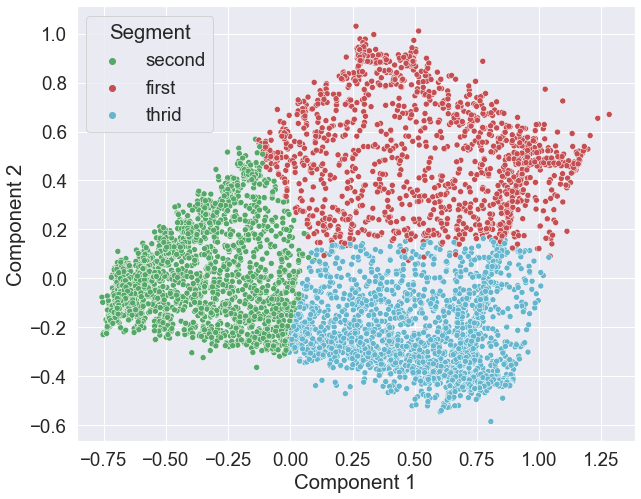

In [132]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c'])
plt.show()

In [133]:
#creating a table, from the original data, with the components and clusters. 
df_segm_pca_kmeans_x = pd.concat([X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans_x.columns.values[-4: ]=['Component 1', 'Component 2', 'Component 3', 'Component 4']

df_segm_pca_kmeans_x['Segment k-means PCA'] = kmeans_pca.labels_

In [134]:
#Renaming the segments
df_segm_pca_kmeans_x['Segment'] = df_segm_pca_kmeans['Segment k-means PCA'].map({0:'first', 
                                                                               1:'second', 
                                                                               2:'thrid', 
                                                                               3:'fourth'})

In [135]:
df_segm_pca_kmeans_x.drop(columns=['Component 1', 'Component 2', 'Component 3', 'Component 4'], inplace=True)

In [137]:
segments_group_3 = df_segm_pca_kmeans_x.groupby('Segment').mean()
segments_group_3.transpose()

Segment,first,second,thrid
BALANCE,1921.157646,1765.918979,1162.313977
BALANCE_FREQUENCY,0.974067,0.850039,0.928425
PURCHASES,3208.832369,299.711819,1091.564471
ONEOFF_PURCHASES,2404.494427,235.259136,281.190099
INSTALLMENTS_PURCHASES,804.337942,64.651117,811.033665
CASH_ADVANCE,661.073165,1389.611616,512.834877
PURCHASES_FREQUENCY,0.891992,0.144908,0.871251
ONEOFF_PURCHASES_FREQUENCY,0.798125,0.082808,0.101793
PURCHASES_INSTALLMENTS_FREQUENCY,0.481044,0.060844,0.820227
CASH_ADVANCE_FREQUENCY,0.093112,0.191387,0.071716
